# Project Final Submission

### Step 1a: Planning 
#### Identify the information in the file your program will read

The file 'kickstarter.csv' contains information about Kickstarter projects. The file has 15 fields.

+ id: internal Kickstarter id
+ name: name of project
+ category: category of project
+ main_category: main category of project
+ currency: currency used to support
+ deadline: deadline for crowdfunding
+ goal: fundraising goal is the amount of money that a creator needs to complete their project
+ launched: date launched
+ pledged: amount pledged by crowd
+ state: current condition the project is in
+ backers: number of backers
+ country: country pledged from
+ usd_pledged: conversion in US dollars of the pledged column (conversion done by Kickstarter)
+ usd_pledged_real: conversion in US dollars of the pledged column (conversion from Fixer.io API)
+ usd_goal_real: conversion in US dollars of the goal column (conversion from Fixer.io API)

### Step 1b: Planning 
#### Write a description of what your program will produce

+ Solve the success rate (excluding canceled, suspended, and undefined projects) by main categories, and plot it as a pie chart and compare the success rate for different main categories.
+ Solve the success indicator for successful projects which is amount of pledged over goal amount. Then arrange successful projects into three substate labels; success, super success, and mega hit. Plot a bar chart of the number of projects by main categories in those three conditions.
+ Classify projects according to amount of goal and find each success rate within a range. Plot a histogram by range of amount of goal and success rate.

I choose to construct the second data analysis program from above.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

The program will produce a bar chart of each main category containing three bars indicating the number of three different success states (success, super success, and mega hit) projects.

expect(main('kickstarter.csv'), None)

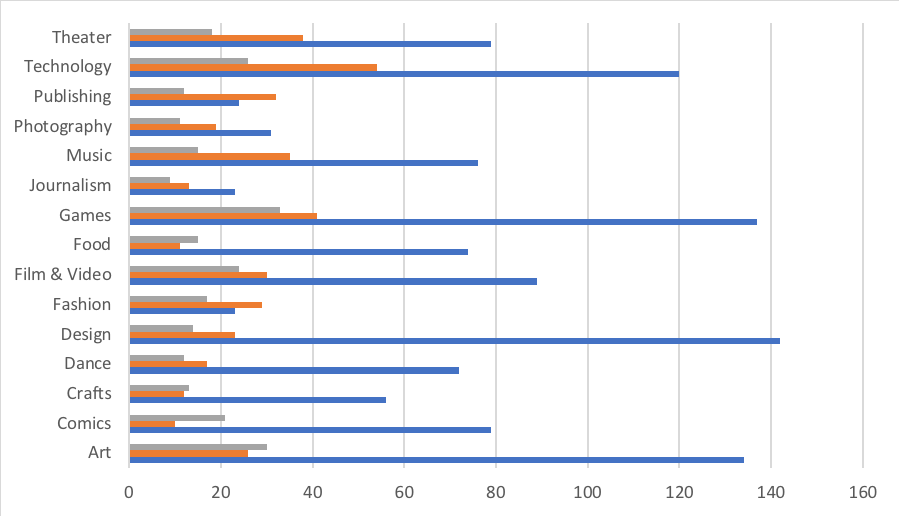

### Step 2a: Building
#### Design data definitions

First of all, I will clearly need the goal amount and the amount of pledged. For unity, I will pick 'usd_goal_real' and 'usd_pledged_real' as my data instead of 'goal' and 'pledged'. (In this particular program, this is not necessary since I am using the 'ratio' between the two, but it is always a good idea to think of further analysis that may need unity.) As well as the amounts, I'll need state and main category which are the two labels for the desired bar chart. I'll also take the project id to my data which is not necessarily needed here but as an identification for each project to make a reader-friendly program. Finally, I will add a new field in the data, a success indicator computed accordingly with goal amount and the amount of pledged. Then for data designing step, I will need to use a compound for each project and an arbitrary number of projects.

In [1]:
from cs103 import *
from enum import Enum
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt

##################
# Data Definitions

MainCategory = Enum('MainCategory', ['art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film_and_video',
                                     'food', 'games', 'journalism', 'music', 'photography', 'publishing',
                                     'technology', 'theater'])
# interp. a main category of project is either art, comics, crafts, dance, design, fashion, film & video, food,
# games, journalism, music, photography, publishing, technology or theater
# examples are redundant for enumerations

@typecheck
# template based on one of (15 cases) and atomic distinct (15 times)
def fn_for_main_category(mc: MainCategory) -> ...:
    if mc == MainCategory.art:
        return ...
    elif mc == MainCategory.comics:
        return ...
    elif mc == MainCategory.crafts:
        return ...
    elif mc == MainCategory.dance:
        return ...
    elif mc == MainCategory.design:
        return ...
    elif mc == MainCategory.fashion:
        return ...
    elif mc == MainCategory.film_and_video:
        return ...
    elif mc == MainCategory.food:
        return ...
    elif mc == MainCategory.games:
        return ...
    elif mc == MainCategory.journalism:
        return ...
    elif mc == MainCategory.music:
        return ...
    elif mc == MainCategory.photography:
        return ...
    elif mc == MainCategory.publishing:
        return ...
    elif mc == MainCategory.technology:
        return ...
    elif mc == MainCategory.theater:
        return ...
    
ProjectState = Enum('ProjectState', ['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'])
# interp. a state of project is either canceled, failed, live, successful, suspended, or undefined
# examples are redundant for enumerations

@typecheck
# template based on one of (5 cases) and atomic distinct (5 times)
def fn_for_project_state(ps: ProjectState) -> ...:
    if ps == ProjectState.canceled:
        return ...
    elif ps == ProjectState.failed:
        return ...
    elif ps == ProjectState.live:
        return ...
    elif ps == ProjectState.successful:
        return ...
    elif ps == ProjectState.suspended:
        return ...
    elif ps == ProjectState.undefined:
        return ...

Project = NamedTuple('Project', [('id', int),                     # in range of [100000000, ...)
                                 ('category', MainCategory),
                                 ('goal', float),                 # in range of [0, ...)
                                 ('pledged', float),              # in range of [0, ...)
                                 ('state', ProjectState),
                                 ('success_indicator', float)])   # in range of [0, ...)
# interp. a project with its id, category, amount of goal in US dollars, amount of pledged in US dollars,
# state and success indicator
P1 = Project(1000002330, MainCategory.publishing, 1533.95, 0.00, ProjectState.failed, 0.00)
P2 = Project(1000014025, MainCategory.food, 50000.00, 52375.00, ProjectState.successful, 1.05)
P3 = Project(1000011046, MainCategory.film_and_video, 19500.00, 1283.00, ProjectState.canceled, 0.07)
P4 = Project(1000057089, MainCategory.games, 6469.73, 121857.33, ProjectState.successful, 18.83)
P5 = Project(1000190427, MainCategory.games, 8105.00, 3000.00, ProjectState.successful, 2.70)
P6 = Project(1004434782, MainCategory.crafts, 2023.00, 3128.00, ProjectState.live, 1.55)
P7 = Project(1001732009, MainCategory.design, 25000.00, 39693.00, ProjectState.suspended, 1.59)
P8 = Project(100149523, MainCategory.music, 3211.53, 3402.08, ProjectState.undefined, 0.94)

@typecheck
def fn_for_project(p: Project) -> ...: # template based on compound and reference
    return ...(p.id,
               fn_for_main_categroy(p.category),
               p.goal,
               p.pledged,
               fn_for_project_state(p.state),
               p.success_indicator)


# List[Project]
# interp. a list of projects

LOP0 = []
LOP1 = [P2]
LOP2 = [P1, P3, P6]
LOP3 = [P1, P2, P3, P4, P5, P6, P7, P8]

@typecheck
def fn_for_lop(lop: List[Project]) -> ...: # template based on arbitrary-sized and reference
    # description of the accumulator
    acc = ... # type: ...
    for p in lop:
        acc = ...(fn_for_project(p), acc)
    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

### ** Remark before we dive in

I already checked the csv file with numbers (program on macbook), and there are no missing or badly formed information in the data. Thus, we won't need any helper function to clear out invalid information when reading the file. 

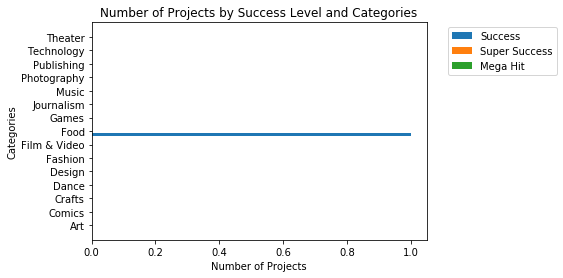

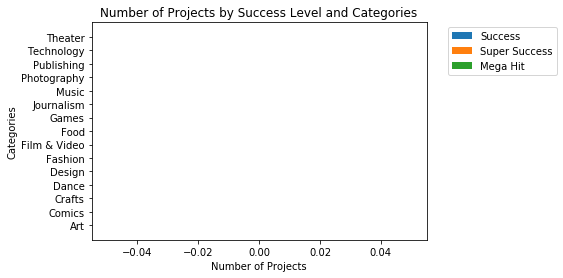

2 of 2 tests passed
20 of 20 tests passed


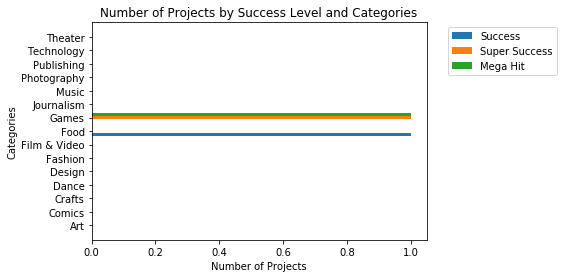

34 of 34 tests passed


In [2]:
###########
# Functions

### MAIN FUNCTION ###

@typecheck
def main(filename: str) -> None:
    """
    reads the file from given filename and plots a bar chart with each main category containing three bars
    which are numbers of projects in three different success levels
    """
    # template from HtDAP, based on function composition 
    return display_three_charts(read(filename))

### READ FUNCTION ###

@typecheck
def parse_main_category(mc_str: str) -> MainCategory:
    """
    transform mc_str from a string into a MainCategory
    assume mc_str is one of art, comics, crafts, dance, design, fashion, film & video, food, games,
    journalism, music, photography, publishing, technology or theater and that the first letter is capitalized
    """
    # return MainCategory.art # stub
    # return ...(mc_str) # template
    
    if mc_str == 'Art':
        return MainCategory.art
    elif mc_str == 'Comics':
        return MainCategory.comics
    elif mc_str == 'Crafts':
        return MainCategory.crafts
    elif mc_str == 'Dance':
        return MainCategory.dance
    elif mc_str == 'Design':
        return MainCategory.design
    elif mc_str == 'Fashion':
        return MainCategory.fashion
    elif mc_str == 'Film & Video':
        return MainCategory.film_and_video
    elif mc_str == 'Food':
        return MainCategory.food
    elif mc_str == 'Games':
        return MainCategory.games
    elif mc_str == 'Journalism':
        return MainCategory.journalism
    elif mc_str == 'Music':
        return MainCategory.music
    elif mc_str == 'Photography':
        return MainCategory.photography
    elif mc_str == 'Publishing':
        return MainCategory.publishing
    elif mc_str == 'Technology':
        return MainCategory.technology
    elif mc_str == 'Theater':
        return MainCategory.theater
    
@typecheck
def parse_state(s_str: str) -> ProjectState:
    """
    transform s_str from a string into a ProjectState
    assume s_str is one of canceled, failed, live, successful, suspended, or undefined
    and that the first letter is not capitalized
    """
    # return ProjectState.successful # stub
    # return ...(s_str) # template
    
    if s_str == 'canceled':
        return ProjectState.canceled
    elif s_str == 'failed':
        return ProjectState.failed
    elif s_str == 'live':
        return ProjectState.live
    elif s_str == 'successful':
        return ProjectState.successful
    elif s_str == 'suspended':
        return ProjectState.suspended
    elif s_str == 'undefined':
        return ProjectState.undefined

@typecheck
def read(filename: str) -> List[Project]:
    """    
    reads information from the specified file and returns a list of projects
    """
    # return []  # stub
    # template from HtDAP
    # lop contains the result so far
    lop = [] # type: List[Project]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            p = Project(parse_int(row[0]), parse_main_category(row[3]), parse_float(row[14]), parse_float(row[13]),
                        parse_state(row[9]), round((parse_float(row[13])/parse_float(row[14])), 2))
            lop.append(p)
    
    return lop

### ANALYZE FUNCTION ###

@typecheck
def display_three_charts(lop: List[Project]) -> None:
    """
    plots a bar graph with the numbers of success, super success, and mega hit projects side-by-side
    labelled by categories
    """
    # return None  # stub
    # template based on visualization
    
    # the width of each bar
    bar_width = 7
    
    success = get_success_counts_list(get_success(get_successful_projects(lop)))
    super_success = get_super_success_counts_list(get_super_success(get_successful_projects(lop)))
    mega_hit = get_mega_hit_counts_list(get_mega_hit(get_successful_projects(lop)))
    categories = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
                  'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater']
    
    # the middle coordinate for each of the bars for the three bar charts
    middle_of_bars_success = produce_num_sequence(success, 0, 30)
    middle_of_bars_super_success = produce_num_sequence(super_success, bar_width, 30)
    middle_of_bars_mega_hit = produce_num_sequence(mega_hit, 2*bar_width, 30)

    # create the bar charts
    rects1 = plt.barh(middle_of_bars_success,
                     success,
                     bar_width,
                     label = 'Success')
    
    rects2 = plt.barh(middle_of_bars_super_success, 
                     super_success, 
                     bar_width,
                     label = 'Super Success')
    
    rects3 = plt.barh(middle_of_bars_mega_hit, 
                     mega_hit, 
                     bar_width,
                     label = 'Mega Hit')

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Number of Projects')
    plt.ylabel('Categories')
    plt.title('Number of Projects by Success Level and Categories')

    # set the labels for each 'tick' on the x-axis
    plt.yticks(middle_of_bars_super_success, categories)
    
    # set the legend since this plot contains more than one bar
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
    
    # show the plot
    plt.show()
    
    return

@typecheck
def get_successful_projects(lop: List[Project]) -> List[Project]:
    """
    given a list of projects, sorts projects that was successful
    """
    # return [] # stub
    # template from List[Project]
    
    # acc_successful contains the successful projects seen so far
    acc_successful = [] # type: List[Project]
    for p in lop:
        if is_successful_project(p):
            acc_successful.append(p)
    return acc_successful

@typecheck
def is_successful_project(p: Project) -> bool:
    """
    returns True if the given project was successful and False otherwise
    (here we don't think about ongoing live projects that pledged more amount than the goal amount
    not only because we can't define an unfinished project into one of success, super success, or mega hit
    unless it already pledged more than five times the goal amount, but also there is a possibility
    that it might get suspended)
    """
    # return False # stub
    # template from Project
    return p.state == ProjectState.successful

@typecheck
def get_success(lop: List[Project]) -> List[Project]:
    """
    given a list of successful projects, sorts success projects
    """
    # return [] # stub
    # template from List[Project]
    
    # acc_success contains the success projects seen so far
    acc_success = [] # type: List[Project]
    for p in lop:
        if is_success(p):
            acc_success.append(p)
    return acc_success

@typecheck
def is_success(p: Project) -> bool:
    """
    takes a successful project, and returns True if the success indicator is in between 1 and 2
    and False otherwise
    """
    # return False # stub
    # template from Project
    return p.success_indicator >= 1 and p.success_indicator < 2

@typecheck
def get_super_success(lop: List[Project]) -> List[Project]:
    """
    given a list of successful projects, sorts super success projects
    """
    # return [] # stub
    # template from List[Project]
    
    # acc_super_success contains the super success projects seen so far
    acc_super_success = [] # type: List[Project]
    for p in lop:
        if is_super_success(p):
            acc_super_success.append(p)
    return acc_super_success

@typecheck
def is_super_success(p: Project) -> bool:
    """
    takes a successful project, and returns True if the success indicator is in between 2 and 3
    and False otherwise
    """
    # return False # stub
    # template from Project
    return p.success_indicator >= 2 and p.success_indicator < 3

@typecheck
def get_mega_hit(lop: List[Project]) -> List[Project]:
    """
    given a list of successful projects, sorts mega hit projects
    """
    # return [] # stub
    # template from List[Project]
    
    # acc_mega_hit contains the mega hit projects seen so far
    acc_mega_hit = [] # type: List[Project]
    for p in lop:
        if is_mega_hit(p):
            acc_mega_hit.append(p)
    return acc_mega_hit

@typecheck
def is_mega_hit(p: Project) -> bool:
    """
    takes a successful project, and returns True if the success indicator is greater than 3
    and False otherwise
    """
    # return False # stub
    # template from Project
    return p.success_indicator >= 3

@typecheck
def count_by_category(lop: List[Project], mc: MainCategory) -> int:
    """
    counts the number of projects of a given category in a list of projects
    """
    # return 0 # stub
    # template based on List[Project] with additional parameter
    
    # count contains the number of projects of a given category seen so far
    count = 0 # type: int
    for p in lop:
        if p.category == mc:
            count = count + 1
    return count

@typecheck
def get_counts_list(lop: List[Project]) -> List[int]:
    """
    returns a list of integers representing the counts of projects for all categories in a given list
    (categories are alphabetically organized)
    """
    # return [] # stub
    # template based on List[Project]

    return [count_by_category(lop, MainCategory.art),
            count_by_category(lop, MainCategory.comics),
            count_by_category(lop, MainCategory.crafts),
            count_by_category(lop, MainCategory.dance),
            count_by_category(lop, MainCategory.design),
            count_by_category(lop, MainCategory.fashion),
            count_by_category(lop, MainCategory.film_and_video),
            count_by_category(lop, MainCategory.food),
            count_by_category(lop, MainCategory.games),
            count_by_category(lop, MainCategory.journalism),
            count_by_category(lop, MainCategory.music),
            count_by_category(lop, MainCategory.photography),
            count_by_category(lop, MainCategory.publishing),
            count_by_category(lop, MainCategory.technology),
            count_by_category(lop, MainCategory.theater)]

@typecheck
def get_success_counts_list(lop: List[Project]) -> List[int]:
    """
    returns a list of integers representing the counts of success projects for all categories in a given list
    (categories are alphabetically organized)
    """
    # return [] # stub
    # template based on List[Project]
    
    return get_counts_list(get_success(get_successful_projects(lop)))

@typecheck
def get_super_success_counts_list(lop: List[Project]) -> List[int]:
    """
    returns a list of integers representing the counts of super success projects for all categories in a given list
    (categories are alphabetically organized)
    """
    # return [] # stub
    # template based on List[Project]
    
    return get_counts_list(get_super_success(get_successful_projects(lop)))

@typecheck
def get_mega_hit_counts_list(lop: List[Project]) -> List[int]:
    """
    returns a list of integers representing the counts of mega hit projects for all categories in a given list
    (categories are alphabetically organized)
    """
    # return [] # stub
    # template based on List[Project]
    
    return get_counts_list(get_mega_hit(get_successful_projects(lop)))

@typecheck
def produce_num_sequence(values: List[float], initial: float, gap: float) -> List[float]:
    """
    produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same length as values
    """
    # return []  # stub
    # template from List[float] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[int]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums

start_testing()

# Examples and tests for main
expect(main('kickstarter1.csv'), None)
expect(main('kickstarter2.csv'), None)

summary()

start_testing()

# Examples and tests for read
expect(parse_main_category('Art'), MainCategory.art)
expect(parse_main_category('Comics'), MainCategory.comics)
expect(parse_main_category('Crafts'), MainCategory.crafts)
expect(parse_main_category('Dance'), MainCategory.dance)
expect(parse_main_category('Design'), MainCategory.design)
expect(parse_main_category('Fashion'), MainCategory.fashion)
expect(parse_main_category('Film & Video'), MainCategory.film_and_video)
expect(parse_main_category('Food'), MainCategory.food)
expect(parse_main_category('Games'), MainCategory.games)
expect(parse_main_category('Journalism'), MainCategory.journalism)
expect(parse_main_category('Music'), MainCategory.music)
expect(parse_main_category('Photography'), MainCategory.photography)
expect(parse_main_category('Publishing'), MainCategory.publishing)
expect(parse_main_category('Technology'), MainCategory.technology)
expect(parse_main_category('Theater'), MainCategory.theater)

expect(parse_state('successful'), ProjectState.successful)
expect(parse_state('failed'), ProjectState.failed)
expect(parse_state('canceled'), ProjectState.canceled)

expect(read('kickstarter1.csv'), LOP1)
expect(read('kickstarter2.csv'), LOP2)

summary()

start_testing()

# Examples and tests for analyze
expect(display_three_charts(LOP3), None)

expect(get_successful_projects([]), [])
expect(get_successful_projects([P1, P2]), [P2])
expect(get_successful_projects(LOP3), [P2, P4, P5])

expect(is_successful_project(P1), False)
expect(is_successful_project(P2), True)

expect(get_success([]), [])
expect(get_success([P2, P4]), [P2])
expect(get_success(LOP3), [P2, P6, P7])

expect(is_success(P2), True)
expect(is_success(P4), False)

expect(get_super_success([]), [])
expect(get_super_success([P2, P4]), [])
expect(get_super_success(LOP3), [P5])

expect(is_super_success(P4), False)
expect(is_super_success(P5), True)

expect(get_mega_hit([]), [])
expect(get_mega_hit([P2, P5]), [])
expect(get_mega_hit(LOP3), [P4])

expect(is_mega_hit(P2), False)
expect(is_mega_hit(P4), True)

expect(count_by_category([], MainCategory.art), 0)
expect(count_by_category(LOP2, MainCategory.food), 0)
expect(count_by_category(LOP3, MainCategory.games), 2)

expect(get_counts_list(LOP1), [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
expect(get_counts_list(LOP3), [0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0])

expect(get_success_counts_list([]), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
expect(get_success_counts_list(LOP3), [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

expect(get_super_success_counts_list([]), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
expect(get_super_success_counts_list(LOP3), [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

expect(get_mega_hit_counts_list([]), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
expect(get_mega_hit_counts_list(LOP3), [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

expect(produce_num_sequence([], 0, 5), [])
expect(produce_num_sequence([10, 30, 35, 70], 5, 10), [5, 15, 25, 35])

summary()

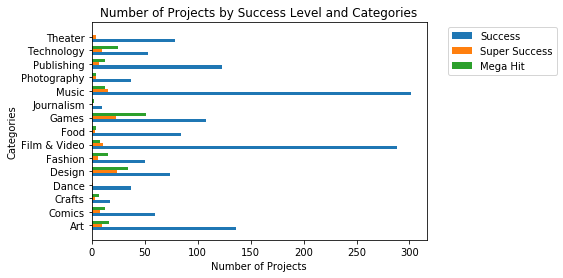

In [3]:
# Final outcome
main('kickstarter.csv')

### Conclusion

I got an interesting result from this analysis project. As we can see from the final plot, 'Music' and 'Film & Video' outnumbered the other categories with success projects while the numbers of mega hit projects were both very low. On the other hand, mega hit projects were mostly from the categories 'Games', 'Design' or 'Technology'. For further analysis, not only comparing the numbers of successful projects, but measuring the rate by computing the total number of projects (including non-successful projects) would give us a more precise result. 